In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, x1])

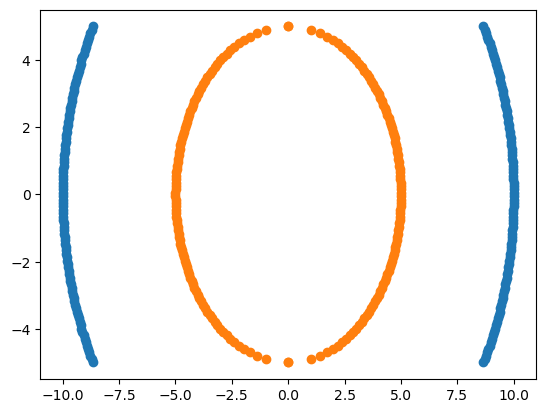

In [8]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [11]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [12]:
df.tail()

,X1,X2,Y
195,-1.969049,4.59596,1
196,-1.714198,4.69697,1
197,-1.406908,4.79798,1
198,-0.999949,4.89899,1
199,-0.000000,5.00000,1


In [15]:
## Indepedent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [17]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
y_train

47     1
110    0
16     0
66     0
153    0
      ..
71     0
106    0
70     1
148    1
102    0
Name: Y, Length: 300, dtype: int64

Polynomial Kernel

In [19]:
 # We need to find components for the Polynomial Kernel
# X1, X2, X1_square, X2_square, X1*X2
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [22]:
## Indepedent and dependent features
X = df[['X1', 'X2', 'X1_square', 'X2_square', 'X1*X2']]
y = df['Y']

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [25]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
47,4.993619,-0.252525,24.936231,0.063769,-1.261015
110,-9.169553,-3.989899,84.080706,15.919294,36.585591
16,9.410082,-3.383838,88.549638,11.450362,-31.842196
66,9.860133,1.666667,97.222222,2.777778,16.433555
153,-9.993749,0.353535,99.875013,0.124987,-3.533143
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,-4.393939,80.693297,19.306703,39.470515
70,4.551063,2.070707,20.712172,4.287828,9.423918
148,-4.997704,-0.151515,24.977043,0.022957,0.757228


In [26]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1_square', color='Y')   
fig.show()

In [28]:
fig = px.scatter_3d(df, x= 'X1_square', y='X2_square', z='X1*X2', color='Y')
fig.show()

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [32]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [33]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [34]:
model = SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0